In [14]:
from analysis import *
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
from bookkeeper import *

In [15]:
SIM_NAME = "selfish_mine_test"
SIM_REPS = 1
SIM_ITERS = 5000000

print(SIM_NAME)
for REP in range(SIM_REPS): 
    print(REP)
    location = f'../dumps/{SIM_NAME}_{REP}'
    nodes = []
    for filename in os.listdir(os.fsencode(location)):
        filename = filename.decode("utf-8")
        with open(f'{location}/{filename}', 'rb') as f:
            if filename ==  'bookkeeper':
                bookkeeper = pickle.load(f)
            else:
                nodes.append(pickle.load(f))

    an = Analysis(bookkeeper, nodes)
            
    print(f'Loaded {len(nodes)} nodes.')

    blocks = an.get_all_blocks()
    print(f'Total blocks:\t{len(blocks)}')

    stale_rates = [an.stale_block_rate(node) for node in nodes]
    print(f'Stale rate:\t{round(np.mean(stale_rates), 5)}')

    block_ints = [an.avg_block_interval(node) for node in nodes]
    print(f'Block interval:\t{np.mean(block_ints)} iters')

    # delays_50 = [an.block_percentile_delay(block, 0.5) for id, block in blocks.items()]
    # delays_90 = [an.block_percentile_delay(block, 0.9) for id, block in blocks.items()]
    # print(f'50% delay:\t{round(np.mean(delays_50), 2)} iters')
    # print(f'90% delay:\t{round(np.mean(delays_90), 2)} iters')

    # tps = an.transactions_per_second(blocks.values(), SIM_ITERS / 10)
    # print(f'Tx per second:\t{tps}')

selfish_mine_test
0
Loaded 2 nodes.
Total blocks:	836
Stale rate:	0.16029
Block interval:	7111.229018492177 iters


In [16]:
honest = [node for node in nodes if 'HONEST' in node.name]
selfish = [node for node in nodes if 'SELFISH' in node.name]
print(len(honest))
print(len(selfish))

1
1


In [4]:
count = 0
for block in honest[0].blockchain.values():
    if type(block) != str and block.miner == 'SELFISH':
        count += 1

print(count)
print(len(honest[0].blockchain))

8
20


In [5]:
for block in honest[0].blockchain.values():
    print(block.height, block.miner, block.id, block.prev_id)

0 satoshi fef42d4a-fb16-469c-844f-193bd4ce9b19 None
1 HONEST 7e8e16c8-3e1c-433d-bb4d-e4a945138b86 fef42d4a-fb16-469c-844f-193bd4ce9b19
2 HONEST 56624b20-8684-4e99-a243-808f446baee0 7e8e16c8-3e1c-433d-bb4d-e4a945138b86
3 HONEST a22f1099-eca8-467d-8efb-698c28b6c0ae 56624b20-8684-4e99-a243-808f446baee0
4 HONEST c06dd3a8-d16f-41b9-996d-9ed6dd31fb1b a22f1099-eca8-467d-8efb-698c28b6c0ae
5 HONEST d52ed087-124d-454a-8506-89a5318f1a61 c06dd3a8-d16f-41b9-996d-9ed6dd31fb1b
5 SELFISH [SELFISH]384adbbc-8440-459d-9ddf-7779753dc1b7 c06dd3a8-d16f-41b9-996d-9ed6dd31fb1b
6 HONEST 43416bdd-4337-40be-a235-a37bb11533a7 [SELFISH]384adbbc-8440-459d-9ddf-7779753dc1b7
6 SELFISH [SELFISH]69fe7af4-ed78-465f-b998-1ce1eef02829 [SELFISH]384adbbc-8440-459d-9ddf-7779753dc1b7
7 SELFISH [SELFISH]d2094d92-8e5e-4daa-9913-81a1b0413f9a [SELFISH]69fe7af4-ed78-465f-b998-1ce1eef02829
8 HONEST 4754a852-4d3e-424a-a945-45d89e2958c3 [SELFISH]d2094d92-8e5e-4daa-9913-81a1b0413f9a
9 HONEST 3c63b34f-2acf-4482-ba35-42ef99a9ba02 4754a8

In [6]:
main_chain = an.get_longest_chain(an.get_all_blocks())

In [7]:
h_count, s_count = 0, 0
for block in main_chain:
    if  block.miner == 'HONEST':
        h_count += 1
    elif block.miner == 'SELFISH':
        s_count += 1

print(h_count)
print(s_count)

7
8


In [8]:
node = selfish[0]
[block.height for id, block in node.private_chain.items()]


[0, 1, 2, 3, 4, 5, 5, 6, 6, 7, 8, 9, 9, 10, 11, 12, 13, 13, 14, 15]

In [10]:
selfish[0].private_chain

{'d11f5d95-7470-46da-99c9-ef526cd71842': <bitcoin.models.BTCBlock at 0x7f9b74f0bbe0>,
 '5ec40aa3-5174-46e5-9c11-e0de9c4285e1': <bitcoin.models.BTCBlock at 0x7f9b74f0bd30>,
 '[SELFISH]acf9ae1f-036c-4cde-9f23-dd33bc242991': <bitcoin.models.BTCBlock at 0x7f9b74f0bf28>,
 '[SELFISH]6738ff65-2419-43bc-8a38-939e05e955f0': <bitcoin.models.BTCBlock at 0x7f9b74f0bf98>,
 '[SELFISH]35ae7073-5fd7-4c51-9e74-742330f64397': <bitcoin.models.BTCBlock at 0x7f9b74ec7128>,
 '[SELFISH]385290e4-d167-4492-ae6d-1d1aac7d1fc9': <bitcoin.models.BTCBlock at 0x7f9b74ec7208>,
 '[SELFISH]38995792-e893-4511-94d8-644fa8658d1d': <bitcoin.models.BTCBlock at 0x7f9b74ec7278>,
 '[SELFISH]cc3fd1ae-0d2a-4538-b8b1-8c9637ac47e6': <bitcoin.models.BTCBlock at 0x7f9b74ec72e8>,
 '[SELFISH]d4830e39-82f2-4f0c-af5d-89e2b3ef9345': <bitcoin.models.BTCBlock at 0x7f9b74ec7358>,
 '[SELFISH]fb1c7de6-8a25-4e36-a430-1fbdda011af0': <bitcoin.models.BTCBlock at 0x7f9b74ec76d8>,
 '[SELFISH]de7114a3-f7e5-48d9-91ea-16437dec6cb0': <bitcoin.models.BT

In [11]:
honest = 0
selfish = 0
for block in main_chain:
    if 'HONEST' in block.miner:
        honest += 1
    elif 'SELFISH' in block.miner:
        selfish += 1
print(f'HONEST: {honest}')
print(f'SELFISH: {selfish}')


HONEST: 516
SELFISH: 7


{'HONEST': 700, 'SELFISH': 800}

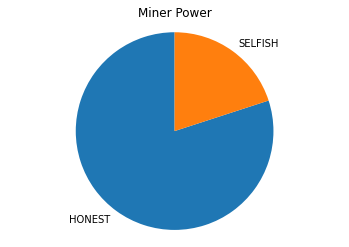

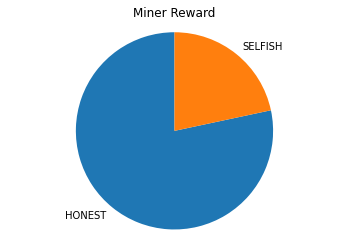

In [19]:
rewards = an.reward_distribution()

fig1, ax1 = plt.subplots()
ax1.pie([honest[0].mine_power, selfish[0].mine_power], labels=['HONEST', 'SELFISH'], startangle=90)
ax1.axis('equal')
plt.title('Miner Power')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(rewards.values(), labels=rewards.keys(), startangle=90)
ax1.axis('equal') 
plt.title('Miner Reward')
plt.show()